In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TRAIN_PATH = "/content/drive/My Drive/SET-chest/TRAIN"
VAL_PATH = "/content/drive/My Drive/SET-chest/TEST"


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from keras.optimizers import SGD

In [ ]:
#my dilated
modeldil = Sequential()
modeldil.add(Conv2D(32,kernel_size=(3),dilation_rate = (5),activation='relu',input_shape=(224,224,3)))
modeldil.add(Conv2D(64,(3,3),activation='relu'))
modeldil.add(MaxPooling2D(pool_size=(2,2)))
modeldil.add(Dropout(0.25))

modeldil.add(Conv2D(64,(3),dilation_rate = (3),activation='relu'))
modeldil.add(MaxPooling2D(pool_size=(2,2)))
modeldil.add(Dropout(0.25))

modeldil.add(Conv2D(128,(3),dilation_rate = (1),activation='relu'))
modeldil.add(MaxPooling2D(pool_size=(2,2)))
modeldil.add(Dropout(0.25))

modeldil.add(Flatten())
modeldil.add(Dense(64,activation='relu'))
modeldil.add(Dropout(0.5))
modeldil.add(Dense(1,activation='sigmoid'))

modeldil.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
#my dilated with d = 7,5,3
modeldil = Sequential()
modeldil.add(Conv2D(32,kernel_size=(3),dilation_rate = (7),activation='relu',input_shape=(224,224,3)))
#modeldil.add(Conv2D(64,(3,3),activation='relu'))
modeldil.add(MaxPooling2D(pool_size=(2,2)))
modeldil.add(Dropout(0.25))

modeldil.add(Conv2D(64,(3),dilation_rate = (5),activation='relu'))
modeldil.add(MaxPooling2D(pool_size=(2,2)))
modeldil.add(Dropout(0.25))

modeldil.add(Conv2D(128,(3),dilation_rate = (3),activation='relu'))
modeldil.add(MaxPooling2D(pool_size=(2,2)))
modeldil.add(Dropout(0.25))

modeldil.add(Flatten())
modeldil.add(Dense(64,activation='relu'))
modeldil.add(Dropout(0.5))
modeldil.add(Dense(1,activation='sigmoid'))

modeldil.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
#point
try with test accuracy
dilation with train and test
dilation rate 1,3,5,7
dataset given by Sir
try with ANN, CNN (partial) 
Activation map

In [ ]:
# CNN Model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
#ANN Model
modelnn = Sequential()
modelnn.add(Flatten())
modelnn.add(Dense(1024, input_shape=(224,224,3), activation="sigmoid"))   # first hidden layer has 1024 nodes
modelnn.add(Dense(512, activation="sigmoid"))                         # second hidden layer has 512 nodes
modelnn.add(Dense(2, activation="softmax"))            # output layer with number of possible class labels
INIT_LR = 0.001
#EPOCHS = 60
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
modelnn.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

[INFO] training network...


In [ ]:
histann = modelnn.fit(train_generator, validation_data = validation_generator, epochs=15, batch_size=32)

Epoch 1/15
38/38 [==============================] - 1065s 28s/step - loss: 0.6990 - accuracy: 0.4567 - val_loss: 0.6940 - val_accuracy: 0.4955
Epoch 2/15
38/38 [==============================] - 48s 1s/step - loss: 0.6939 - accuracy: 0.4634 - val_loss: 0.6939 - val_accuracy: 0.5135
Epoch 3/15
38/38 [==============================] - 48s 1s/step - loss: 0.6938 - accuracy: 0.4692 - val_loss: 0.6938 - val_accuracy: 0.5405
Epoch 4/15
38/38 [==============================] - 47s 1s/step - loss: 0.6937 - accuracy: 0.4967 - val_loss: 0.6938 - val_accuracy: 0.5495
Epoch 5/15
38/38 [==============================] - 48s 1s/step - loss: 0.6937 - accuracy: 0.4975 - val_loss: 0.6937 - val_accuracy: 0.5405
Epoch 6/15
38/38 [==============================] - 48s 1s/step - loss: 0.6936 - accuracy: 0.5116 - val_loss: 0.6937 - val_accuracy: 0.5495
Epoch 7/15
38/38 [==============================] - 47s 1s/step - loss: 0.6936 - accuracy: 0.5133 - val_loss: 0.6937 - val_accuracy: 0.5676
Epoch 8/15
38/38 

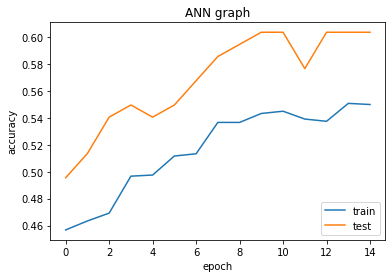

In [ ]:
#updated
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(histann.history['accuracy'])
plt.plot(histann.history['val_accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('ANN graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
modeldil.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 208, 208, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 206, 206, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 103, 103, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 103, 103, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 64)        0

In [ ]:
# Train from scratch , Data Augmentation
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/SET-chest/TRAIN',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 1194 images belonging to 2 classes.


In [ ]:
random.shuffle(train_generator)

TypeError: ignored

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/My Drive/SET-chest/TEST',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 111 images belonging to 2 classes.


In [ ]:
test_generator = test_dataset.flow_from_directory(
    '/content/drive/My Drive/SET-chest/tst',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 8 images belonging to 2 classes.


In [ ]:
histdil = modeldil.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
10/10 [==============================] - 185s 18s/step - loss: 1.5663 - accuracy: 0.4844 - val_loss: 0.6907 - val_accuracy: 0.8125
Epoch 2/30
10/10 [==============================] - 111s 11s/step - loss: 0.6766 - accuracy: 0.5938 - val_loss: 0.6680 - val_accuracy: 0.7188
Epoch 3/30
10/10 [==============================] - 70s 7s/step - loss: 0.5397 - accuracy: 0.7248 - val_loss: 0.4744 - val_accuracy: 0.7812
Epoch 4/30
10/10 [==============================] - 61s 6s/step - loss: 0.3684 - accuracy: 0.8389 - val_loss: 0.3623 - val_accuracy: 0.8438
Epoch 5/30
10/10 [==============================] - 51s 5s/step - loss: 0.3741 - accuracy: 0.8656 - val_loss: 0.3077 - val_accuracy: 0.9375
Epoch 6/30
10/10 [==============================] - 35s 3s/step - loss: 0.2735 - accuracy: 0.9156 - val_loss: 0.2535 - val_accuracy: 0.9688
Epoch 7/30
10/10 [==============================] - 26s 3s/step - loss: 0.2215 -

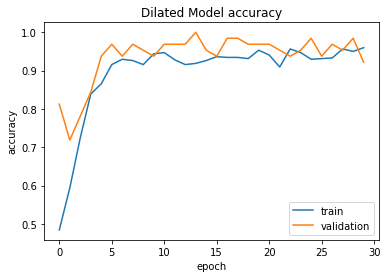

In [ ]:
plt.plot(histdil.history['accuracy'])
plt.plot(histdil.history['val_accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

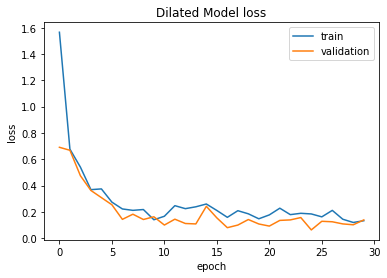

In [ ]:
plt.plot(histdil.history['loss'])
plt.plot(histdil.history['val_loss'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

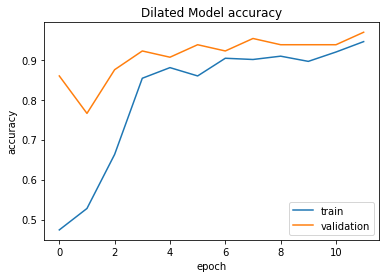

In [ ]:
#set graph with d = 7, 5 ,3
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(histdil.history['accuracy'])
plt.plot(histdil.history['val_accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

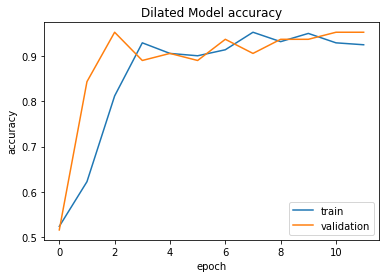

In [ ]:
#set graph
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(histdil.history['accuracy'])
plt.plot(histdil.history['val_accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

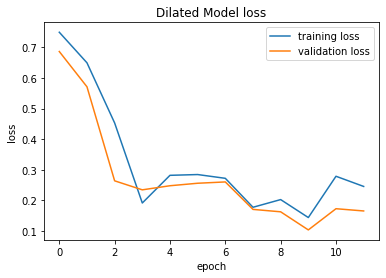

In [ ]:
#cnn graph
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(histdil.history['loss'])
plt.plot(histdil.history['val_loss'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

In [ ]:
print(modeldil.evaluate(test_generator))

1/1 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7500
[0.5784481763839722, 0.75]


In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(train_generator,test_size=0.1)

KeyboardInterrupt: ignored

In [ ]:
#option to stop training
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.96):
            print("\nReached 97% accuracy so cancelling training!")
            self.modeldil.stop_training = True

In [ ]:
#option
callbacks = myCallback()
hist = modeldil.fit_generator(train_generator,epochs = 10,
                             validation_data = validation_generator,
                             callbacks = [callbacks])
#hist = modeldil.fit_generator(train_generator,epochs = 10,
                             validation_data = validation_generator,
                             callbacks = [callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
38/38 [==============================] - 794s 21s/step - loss: 0.5537 - accuracy: 0.7047 - val_loss: 0.2367 - val_accuracy: 0.9459
Epoch 2/20
38/38 [==============================] - 47s 1s/step - loss: 0.2685 - accuracy: 0.9118 - val_loss: 0.1209 - val_accuracy: 0.9640
Epoch 3/20
38/38 [==============================] - 47s 1s/step - loss: 0.1868 - accuracy: 0.9451 - val_loss: 0.1240 - val_accuracy: 0.9730
Epoch 4/20
38/38 [==============================] - 47s 1s/step - loss: 0.2010 - accuracy: 0.9334 - val_loss: 0.2353 - val_accuracy: 0.8739
Epoch 5/20
38/38 [==============================] - 47s 1s/step - loss: 0.1901 - accuracy: 0.9334 - val_loss: 0.1406 - val_accuracy: 0.9459
Epoch 6/20
38/38 [==============================] - 47s 1s/step - loss: 0.1624 - accuracy: 0.9459 - val_loss: 0.0924 - val_accuracy: 0.9640
Epoch 7/20
38/38 [==============================] - 47s 1s/step - loss: 0.2111 - a

AttributeError: ignored

In [ ]:
histcnn = model.fit_generator(
    train_generator,
    steps_per_epoch=12,
    epochs = 12,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/12
12/12 [==============================] - 18s 1s/step - loss: 1.2046 - accuracy: 0.5635 - val_loss: 0.6860 - val_accuracy: 0.7969
Epoch 2/12
12/12 [==============================] - 16s 1s/step - loss: 0.6463 - accuracy: 0.6630 - val_loss: 0.6242 - val_accuracy: 0.8906
Epoch 3/12
12/12 [==============================] - 16s 1s/step - loss: 0.4314 - accuracy: 0.8333 - val_loss: 0.2208 - val_accuracy: 0.9375
Epoch 4/12
12/12 [==============================] - 18s 1s/step - loss: 0.3487 - accuracy: 0.8932 - val_loss: 0.2489 - val_accuracy: 0.9219
Epoch 5/12
12/12 [==============================] - 17s 1s/step - loss: 0.2828 - accuracy: 0.8906 - val_loss: 0.2146 - val_accuracy: 0.9375
Epoch 6/12
12/12 [==============================] - 17s 1s/step - loss: 0.2687 - accuracy: 0.8776 - val_loss: 0.1248 - val_accuracy: 0.9844
Epoch 7/12
12/12 [==============================] - 17s 1s/step - loss: 0.3201 - accuracy: 0.8932 - val_loss: 0.2684 - val_accuracy: 0.9375
Epoch 8/12
12/12 [==

In [ ]:
#cnn graph
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

In [ ]:
histdil = modeldil.fit_generator(
    train_generator,
    steps_per_epoch=12,
    epochs = 12,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/12
12/12 [==============================] - 267s 22s/step - loss: 0.9844 - accuracy: 0.5573 - val_loss: 0.6638 - val_accuracy: 0.7656
Epoch 2/12
12/12 [==============================] - 153s 13s/step - loss: 0.5377 - accuracy: 0.7422 - val_loss: 0.4260 - val_accuracy: 0.8438
Epoch 3/12
12/12 [==============================] - 120s 10s/step - loss: 0.3365 - accuracy: 0.8568 - val_loss: 0.2585 - val_accuracy: 0.8906
Epoch 4/12
12/12 [==============================] - 72s 6s/step - loss: 0.2693 - accuracy: 0.9062 - val_loss: 0.1848 - val_accuracy: 0.9375
Epoch 5/12
12/12 [==============================] - 48s 4s/step - loss: 0.2731 - accuracy: 0.8892 - val_loss: 0.1581 - val_accuracy: 0.9375
Epoch 6/12
12/12 [==============================] - 38s 3s/step - loss: 0.2266 - accuracy: 0.8906 - val_loss: 0.1462 - val_accuracy: 0.9688
Epoch 7/12
12/12 [==============================] - 25s 2s/step - loss: 0.2541 - accuracy: 0.9216 - val_loss: 0.1965 - val_accuracy: 0.9531
Epoch 8/12
12/

In [ ]:
hist= model.fit_generator(
    train_generator,
    steps_per_epoch=12,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/15
12/12 [==============================] - 15s 1s/step - loss: 1.2253 - accuracy: 0.5351 - val_loss: 0.6908 - val_accuracy: 0.4844
Epoch 2/15
12/12 [==============================] - 14s 1s/step - loss: 0.6567 - accuracy: 0.6016 - val_loss: 0.6381 - val_accuracy: 0.8594
Epoch 3/15
12/12 [==============================] - 14s 1s/step - loss: 0.4650 - accuracy: 0.7812 - val_loss: 0.2808 - val_accuracy: 0.9375
Epoch 4/15
12/12 [==============================] - 14s 1s/step - loss: 0.3041 - accuracy: 0.8958 - val_loss: 0.1693 - val_accuracy: 0.9375
Epoch 5/15
12/12 [==============================] - 14s 1s/step - loss: 0.2498 - accuracy: 0.9089 - val_loss: 0.1738 - val_accuracy: 0.9219
Epoch 6/15
12/12 [==============================] - 14s 1s/step - loss: 0.3113 - accuracy: 0.8672 - val_loss: 0.1837 - val_accuracy: 0.9219
Epoch 7/15
12/12 [==============================] - 14s 1s/step - loss: 0.2630 - accuracy: 0.8906 - val_loss: 0.1640 - val_accuracy: 0.9531
Epoch 8/15
12/12 [==

In [ ]:
# Let's now save our model to a file
import tensorflow as tf
modeldil.save('chestXray_image_classifier.h5')



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Load the model
modeldil = tf.keras.models.load_model('chestXray_image_classifier.h5')

modeldil.evaluate_generator(validation_generator)

#Prediction on image
pred = modeldil.predict_generator(validation_generator)

predictions = pred > .5

print(classification_report(validation_generator.classes,predictions))
print(confusion_matrix(validation_generator.classes,predictions))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

           0       0.54      0.53      0.53        55
           1       0.54      0.55      0.55        56

    accuracy                           0.54       111
   macro avg       0.54      0.54      0.54       111
weighted avg       0.54      0.54      0.54       111

[[29 26]
 [25 31]]


In [ ]:
print("[INFO] evaluating network...")
predIdxs = modeldil.predict(validation_generator, batch_size=32)

[INFO] evaluating network...


In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
#validation_generator.class_indices

{'cov19': 0, 'pneumonia': 1}

In [ ]:
#Image prediction

import numpy as np
from keras.preprocessing import image

# predicting images
#fn = 'cat-2083492_640.jpg'  # name of the image
path='/content/drive/My Drive/SET-chest/TEST/pneumonia/PNEUMONIA(1).jpg'    # path to the image
img = image.load_img(path, target_size=(224, 224)) # edit the target_size

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = modeldil.predict(images) # edit the batch_size

print(classes)

[[1.]]


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nReached 97% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
results = model.fit_generator(train_image_gen,epochs = 85,
                             validation_data = test_image_gen,
                             callbacks = [callbacks])

# Let's now save our model to a file
model.save('cell_image_classifier.h5')

# Load the model
model = tf.keras.models.load_model('cell_image_classifier.h5')

model.evaluate_generator(test_image_gen)

#Prediction on image
pred = model.predict_generator(test_image_gen)

predictions = pred > .5

print(classification_report(test_image_gen.classes,predictions))
confusion_matrix(test_image_gen.classes,predictions)

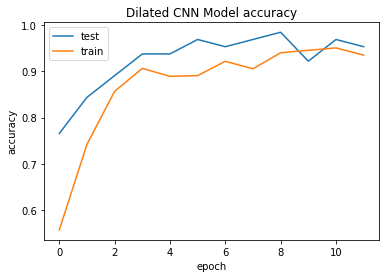

In [ ]:
#upppdated dilated cnn graph
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(histdil.history['val_accuracy'])
plt.plot(histdil.history['accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated CNN Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

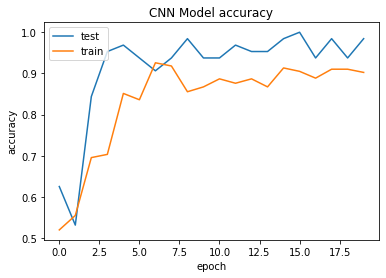

In [ ]:
#cnn graph
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

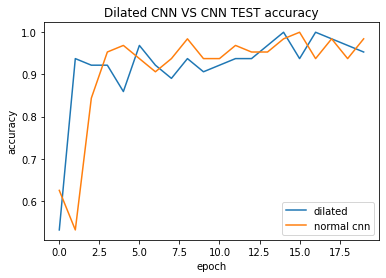

In [ ]:
#cnn graph
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(histdil.history['val_accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated CNN VS CNN TEST accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dilated', 'normal cnn'], loc='lower right')
plt.show()

NameError: ignored

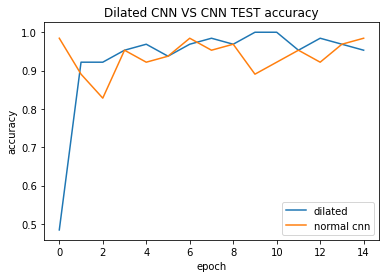

In [ ]:
#updated
import matplotlib.pyplot as plt
%matplotlib inline

# listing data in graph
#print(hist.history.keys())

# summarize graph for accuracy
#plt.plot(hist.history['accuracy'])
plt.plot(histdil.history['val_accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.plot(histcnn.history['val_accuracy'])
#plt.plot(histdil.history['accuracy'])
#plt.plot(histdil.history['val_accuracy'])
plt.title('Dilated CNN VS CNN TEST accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dilated', 'normal cnn'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

# The local path to our target image
img_path = keras.utils.get_file("x-ray-covid-19-header-1920x1080-07267872~7.jpg","https://static.healthcare.siemens.com/siemens_hwem-hwem_ssxa_websites-context-root/wcm/idc/groups/public/@global/documents/image/mda5/nzgw/~edisp/x-ray-covid-19-header-1920x1080-07267872/~renditions/x-ray-covid-19-header-1920x1080-07267872~7.jpg")

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

    # Prepare image
#img_path = '/content/drive/My Drive/SET-chest/TEST/cov19/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg'
img_array = preprocess_input(get_img_array(img_path, target_size=224))

# Make model
model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

TypeError: ignored

TypeError: ignored